 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_ret_csv = Path("data/whale_returns.csv")
whale_df = pd.read_csv(whale_ret_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
# Drop nulls
whale_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("data/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isna()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [7]:
# Drop nulls
algo_returns_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("data/sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")
# Must also remove commas in those values or STR will not convert to FLOAT
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "")
sp_tsx_history_df["Close"].head()

C:\Users\LarryGagnon\AppData\Local\Temp\ipykernel_18472\1355132550.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
Name: Close, dtype: object

In [11]:
# Rename `Close` Column to be specific to this portfolio.
# Calculate Daily Returns
sp_tsx_history_df = sp_tsx_history_df.rename({"Close":"S&P Daily"}, axis='columns')
sp_tsx_daily_df = sp_tsx_history_df['S&P Daily'].astype('float').pct_change()
sp_tsx_daily_df.head()

Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
Name: S&P Daily, dtype: float64

In [12]:
# Drop nulls
sp_tsx_daily_df.dropna()

Date
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
2012-10-09   -0.011709
                ...   
2019-12-20    0.003188
2019-12-23    0.000600
2019-12-24    0.003003
2019-12-27   -0.000695
2019-12-30   -0.004057
Name: S&P Daily, Length: 1817, dtype: float64

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [13]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
whale_algo_sp_df = pd.concat([whale_df, algo_returns_df, sp_tsx_daily_df], axis=1, join="inner")
whale_algo_sp_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

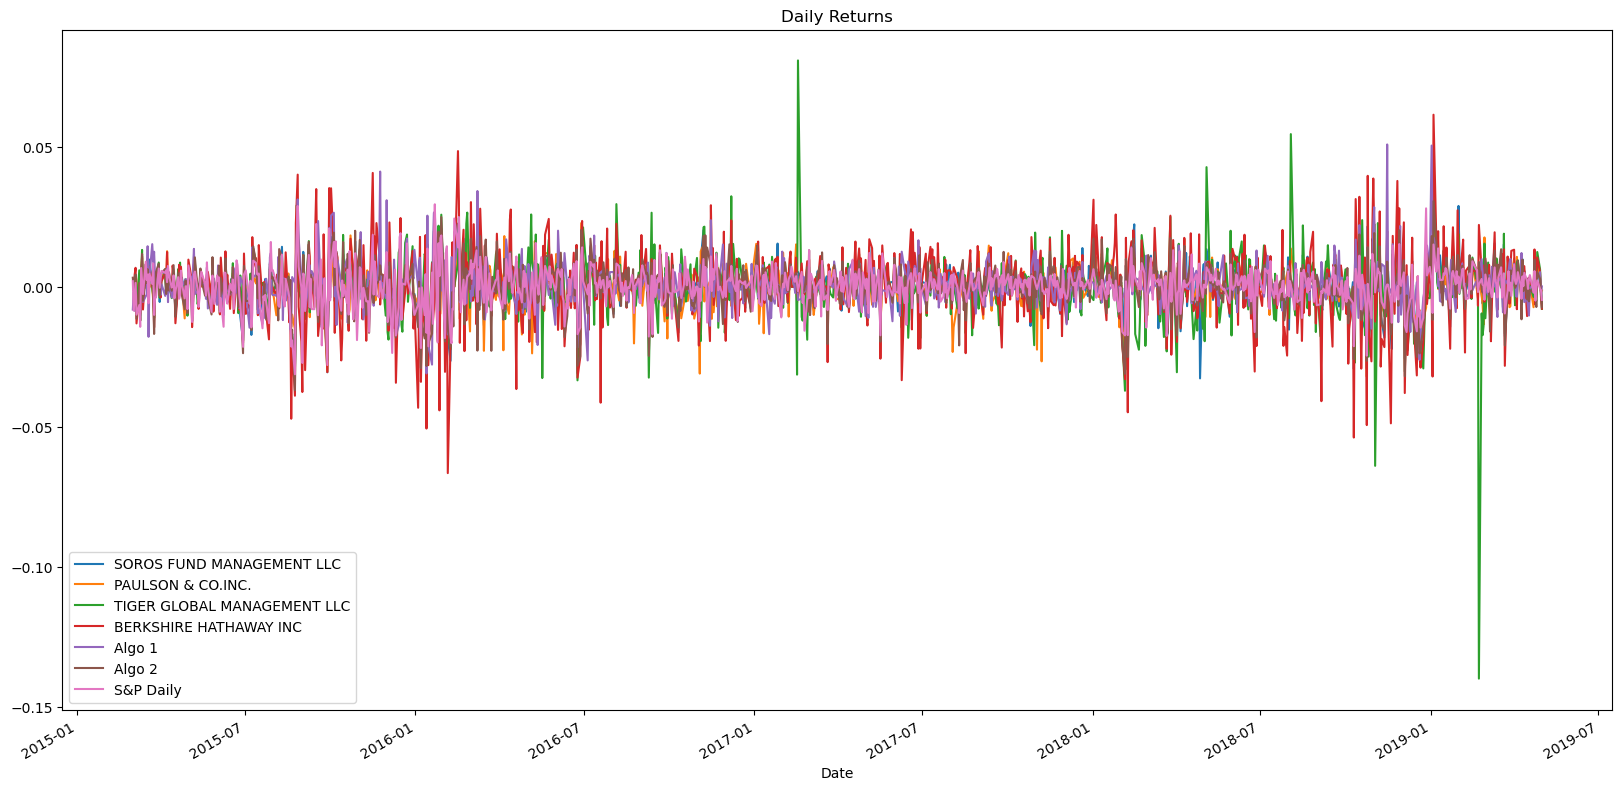

In [14]:
# Plot daily returns of all portfolios
whale_algo_sp_df.plot(figsize=(20, 10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Comparison of Cumulative Returns'}, xlabel='Date'>

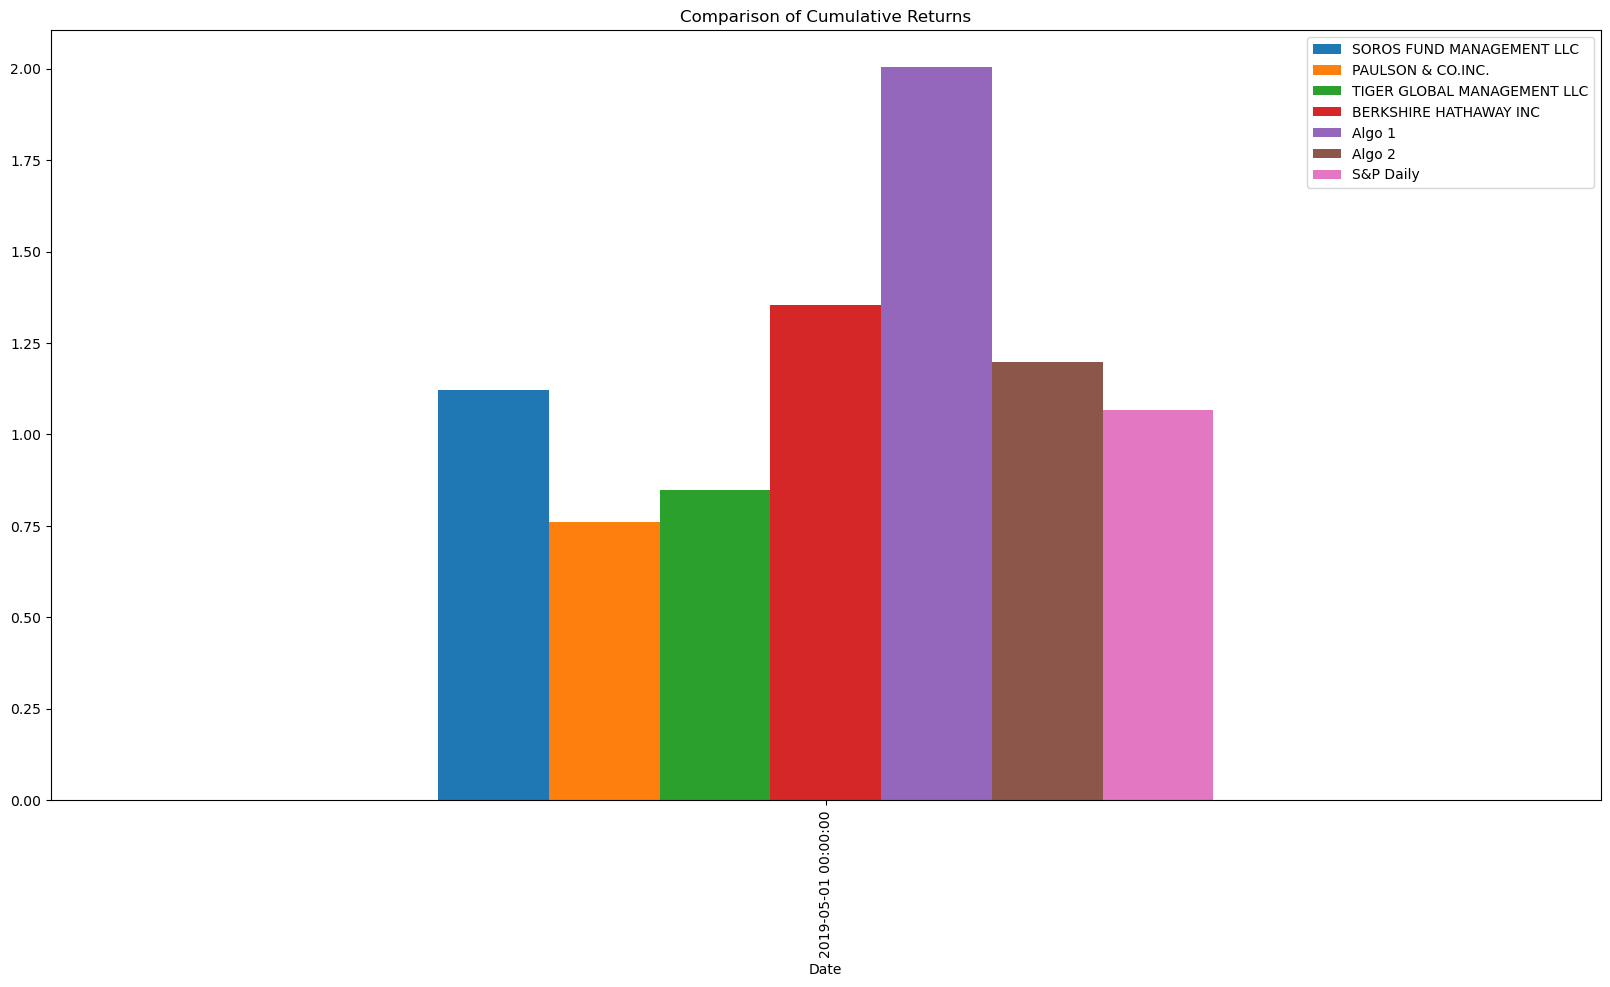

In [15]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + whale_algo_sp_df).cumprod()

# Plot cumulative returns
cumulative_returns.tail(1).plot(figsize=(20, 10), title="Comparison of Cumulative Returns", kind="bar")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'All Portfolio Returns'}>

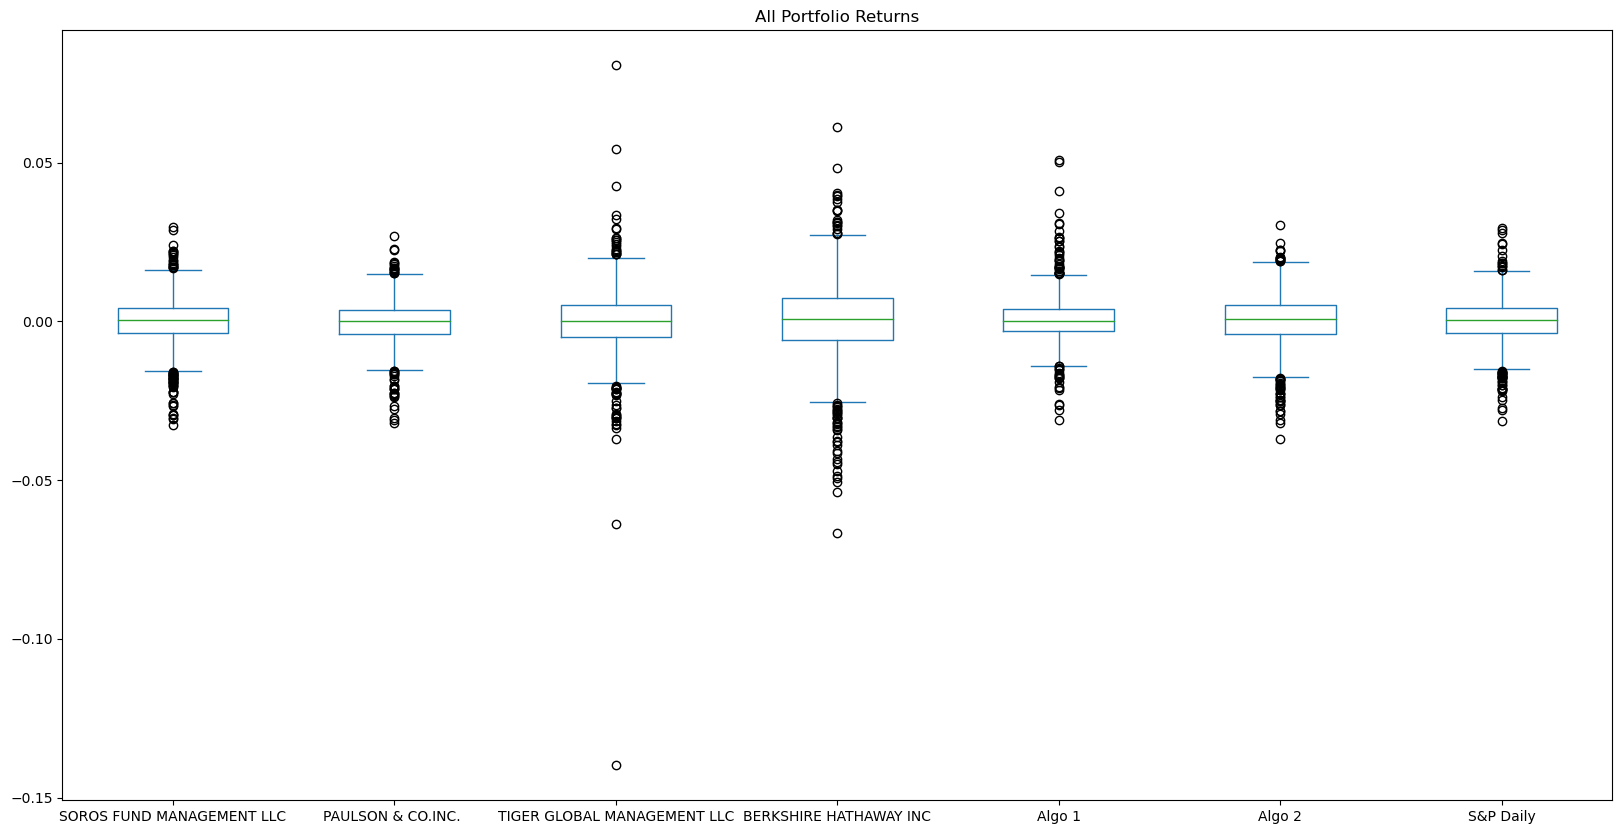

In [16]:
# Box plot to visually show risk
whale_algo_sp_df.plot(figsize=(20, 10), title="All Portfolio Returns", kind='box')

### Calculate Standard Deviations

In [17]:
# Calculate the daily standard deviations of all portfolios
whale_algo_sp_df_std = whale_algo_sp_df.std()
whale_algo_sp_df_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007590
Algo 2                         0.008323
S&P Daily                      0.007031
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

<AxesSubplot:ylabel='Frequency'>

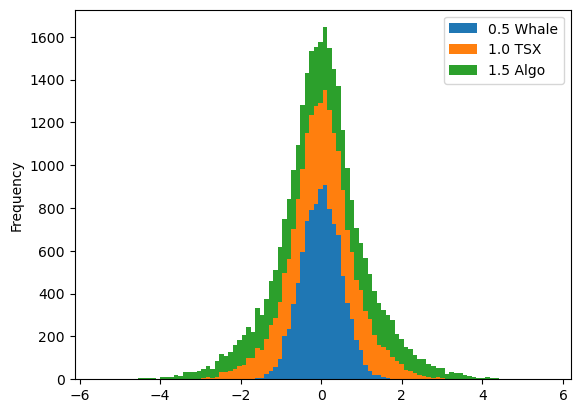

In [18]:
# Calculate  the daily standard deviation of S&P TSX 60
# Determine which portfolios are riskier than the S&P TSX 60

whale_df_std = whale_df.std()
sp_tsx_daily_df_std = sp_tsx_daily_df.std()
algo_returns_df_std = algo_returns_df.std()

whale_df_std = np.random.normal(scale=0.5, size=10000)
sp_tsx_daily_df_std = np.random.normal(scale=1.0, size=10000)
algo_returns_df_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5 Whale": whale_df_std,
    "1.0 TSX": sp_tsx_daily_df_std,
    "1.5 Algo": algo_returns_df_std
})

portfolio_std.plot.hist(stacked=True, bins=100)
# Answer: Algo is riskier than TSX.

### Calculate the Annualized Standard Deviation

In [19]:
# Calculate the annualized standard deviation (252 trading days)
annual_whale_df_std = whale_df_std * np.sqrt(252)
annual_whale_df_std

array([ 2.59024199, 15.10269296,  1.09776586, ..., -0.69888624,
        1.77467823,  6.29950248])

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD DEV'}, xlabel='Date'>

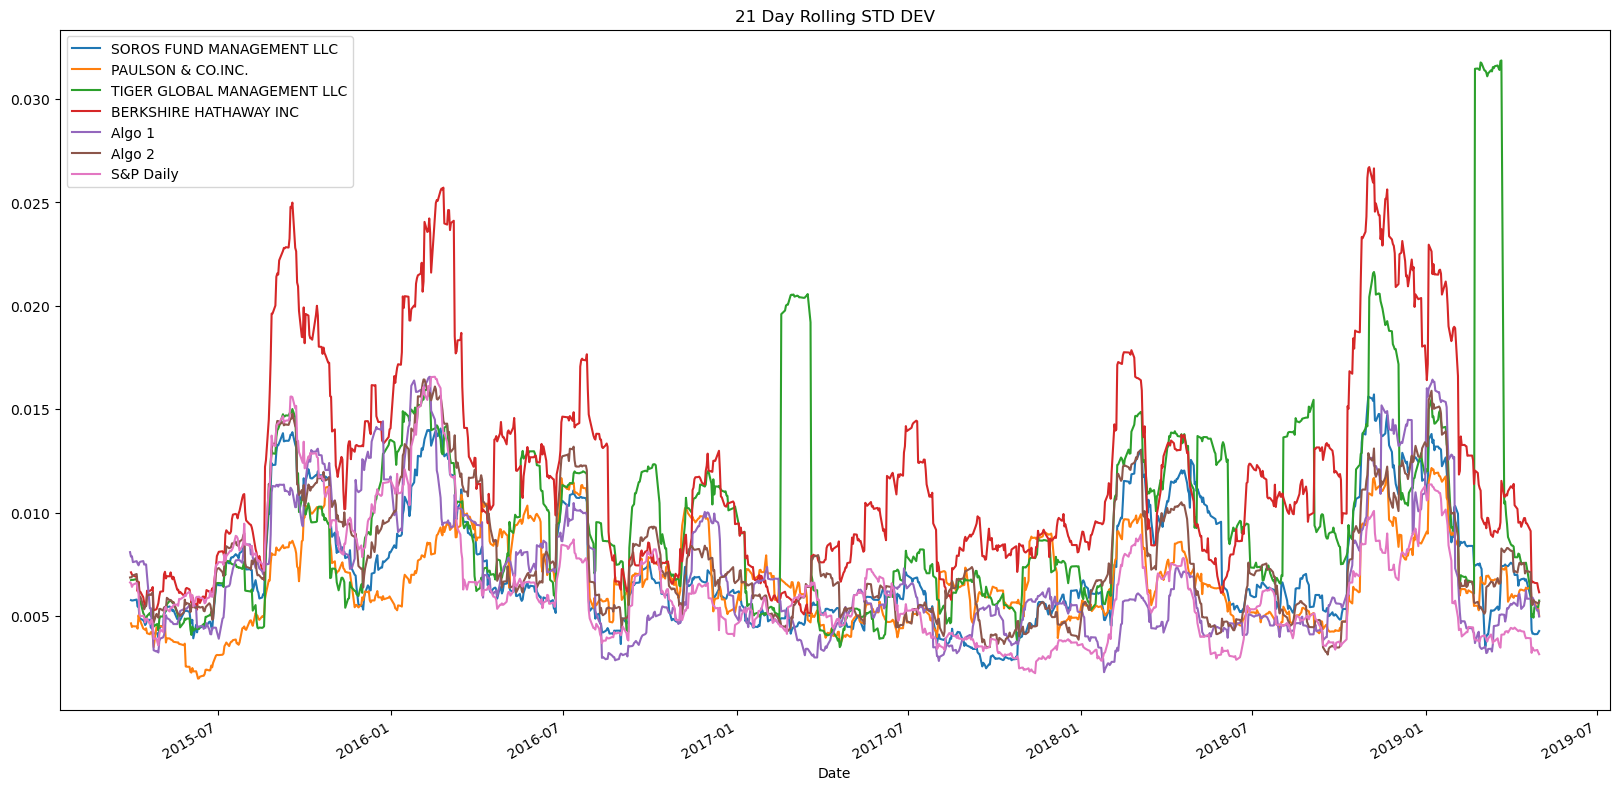

In [20]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

whale_algo_sp_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling STD DEV")

### Calculate and plot the correlation

<AxesSubplot:>

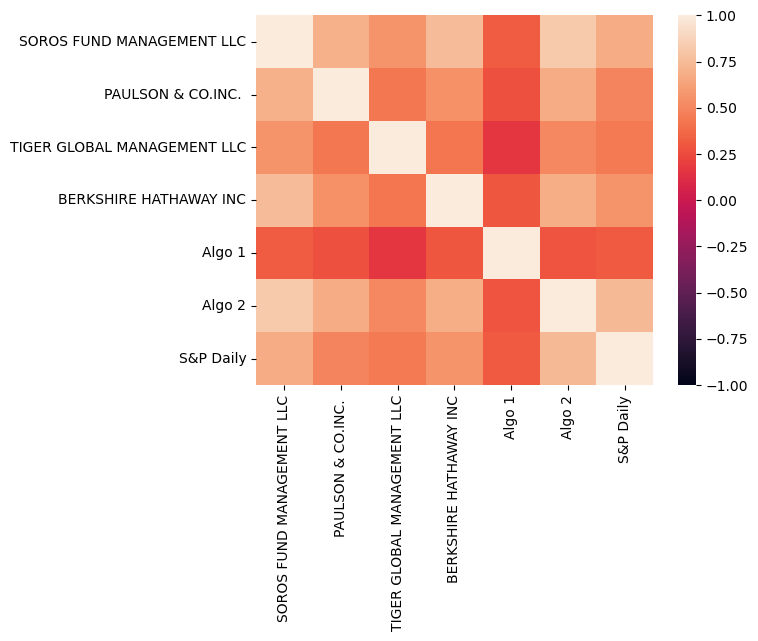

In [21]:
# Calculate the correlation
whale_corr = whale_algo_sp_df.corr()
# whale_corr.head()
# Display the correlation matrix
sns.heatmap(whale_corr, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Soros Beta Calculation'}, xlabel='Date'>

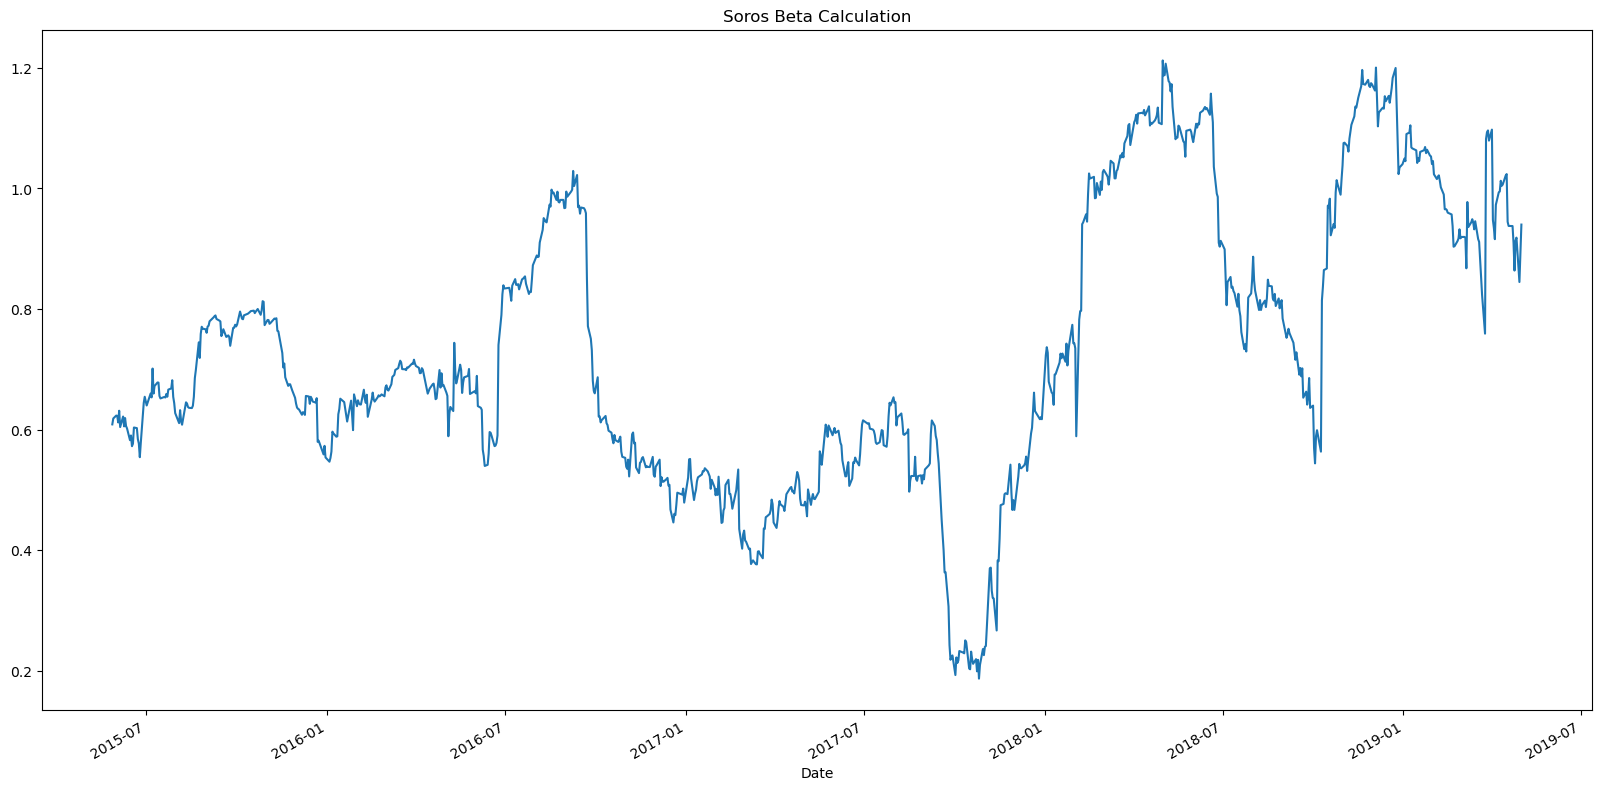

In [22]:
# Calculate covariance of a single portfolio
soros_cov = whale_algo_sp_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(whale_algo_sp_df["S&P Daily"])
soros_cov

# Calculate variance of S&P TSX
sp_var = whale_algo_sp_df["S&P Daily"].rolling(60).var()
sp_var

# Computing beta
beta = (soros_cov / sp_var)

# Plot beta trend
beta.plot(figsize=(20,10), title="Soros Beta Calculation")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [23]:
# Use `ewm` to calculate the rolling window
whale_ewm = whale_algo_sp_df.ewm(halflife='21 days', times=pd.DatetimeIndex(whale_algo_sp_df['S&P Daily'])).mean()
whale_ewm.tail(21)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily
Date,,,,,,,
2019-04-02,0.000110,-0.000261,-0.000124,0.000363,0.000725,0.000209,0.000076
2019-04-03,0.000114,-0.000259,-0.000118,0.000366,0.000721,0.000209,0.000077
2019-04-04,0.000115,-0.000248,-0.000110,0.000358,0.000717,0.000213,0.000078
2019-04-05,0.000122,-0.000242,-0.000101,0.000363,0.000718,0.000221,0.000083
2019-04-08,0.000122,-0.000242,-0.000100,0.000364,0.000721,0.000221,0.000084
2019-04-09,0.000116,-0.000246,-0.000107,0.000361,0.000732,0.000210,0.000080
2019-04-10,0.000126,-0.000237,-0.000104,0.000366,0.000727,0.000219,0.000083
2019-04-11,0.000129,-0.000241,-0.000104,0.000365,0.000728,0.000217,0.000083
2019-04-12,0.000135,-0.000242,-0.000100,0.000372,0.000722,0.000222,0.000088


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [24]:
# Annualized Sharpe Ratios
whale_algo_sp_df_sharpe = ((whale_algo_sp_df.mean()*252) / (whale_algo_sp_df.std()* np.sqrt(252)))
whale_algo_sp_df_sharpe

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.473237
Algo 2                         0.402526
S&P Daily                      0.199724
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for Portfolio'}>

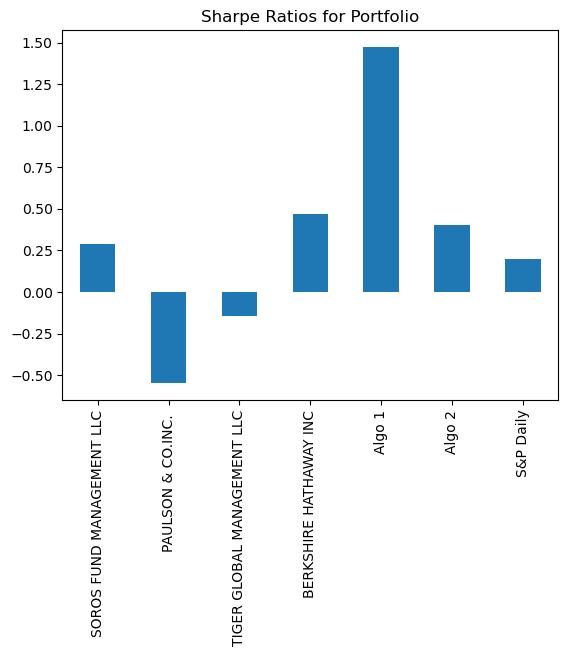

In [25]:
# Visualize the sharpe ratios as a bar plot
whale_algo_sp_df_sharpe.plot(kind='bar', title="Sharpe Ratios for Portfolio")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [26]:
# The performance of Algo 1 is superior to the Whale Portoflio and the S&P TSX 60.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
CIBR_csv = Path("myData/CIBR.csv")
CIBR_df = pd.read_csv(CIBR_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
CIBR_df = CIBR_df.rename({"Close":"CIBR Close"}, axis='columns')
CIBR_df.head()

,CIBR Close
Date,
2018-05-01 16:00:00,25.94
2018-05-02 16:00:00,25.95
2018-05-03 16:00:00,25.89
2018-05-04 16:00:00,26.16
2018-05-07 16:00:00,26.42


In [28]:
# Reading data from 2nd stock
WBA_csv = Path("myData/WBA.csv")
WBA_df = pd.read_csv(WBA_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
WBA_df = WBA_df.rename({"Close":"WBA Close"}, axis='columns')
WBA_df.head()

,WBA Close
Date,
2018-05-01 16:00:00,65.42
2018-05-02 16:00:00,63.65
2018-05-03 16:00:00,62.23
2018-05-04 16:00:00,63.81
2018-05-07 16:00:00,62.30


In [29]:
# Reading data from 3rd stock
MFC_csv = Path("myData/MFC.csv")
MFC_df = pd.read_csv(MFC_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
MFC_df = MFC_df.rename({"Close":"MFC Close"}, axis='columns')
MFC_df.head()

,MFC Close
Date,
2018-05-01 16:00:00,24.23
2018-05-02 16:00:00,23.45
2018-05-03 16:00:00,23.77
2018-05-04 16:00:00,24.09
2018-05-07 16:00:00,24.49


In [33]:
# Combine all stocks in a single DataFrame
my_stocks_df = pd.concat([CIBR_df, WBA_df, MFC_df], axis=1, join="inner")
my_stocks_df.head()

,CIBR Close,WBA Close,MFC Close
Date,,,
2018-05-01 16:00:00,25.94,65.42,24.23
2018-05-02 16:00:00,25.95,63.65,23.45
2018-05-03 16:00:00,25.89,62.23,23.77
2018-05-04 16:00:00,26.16,63.81,24.09
2018-05-07 16:00:00,26.42,62.30,24.49


In [34]:
# Reset Date index
my_stocks_df.set_index('Date', inplace=True)
my_stocks_df.head()

KeyError: "None of ['Date'] are in the columns"

In [35]:
# Reorganize portfolio data by having a column per symbol
# Already done when I made the individual df's.
my_stocks_df.head()

,CIBR Close,WBA Close,MFC Close
Date,,,
2018-05-01 16:00:00,25.94,65.42,24.23
2018-05-02 16:00:00,25.95,63.65,23.45
2018-05-03 16:00:00,25.89,62.23,23.77
2018-05-04 16:00:00,26.16,63.81,24.09
2018-05-07 16:00:00,26.42,62.30,24.49


In [36]:
# Calculate daily returns
my_stocks_daily_df = my_stocks_df.pct_change()
my_stocks_daily_df.head()

,CIBR Close,WBA Close,MFC Close
Date,,,
2018-05-01 16:00:00,NaN,NaN,NaN
2018-05-02 16:00:00,0.000386,-0.027056,-0.032191
2018-05-03 16:00:00,-0.002312,-0.022310,0.013646
2018-05-04 16:00:00,0.010429,0.025390,0.013462
2018-05-07 16:00:00,0.009939,-0.023664,0.016604


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
# Calculate portfolio return
# Display sample data
weights = [0.5, 0.5, 0.5]
new = my_stocks_daily_df.dot(weights)
new.head()

Date
2018-05-01 16:00:00         NaN
2018-05-02 16:00:00   -0.029431
2018-05-03 16:00:00   -0.005488
2018-05-04 16:00:00    0.024640
2018-05-07 16:00:00    0.001440
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Join your returns DataFrame to the original returns DataFrame************************************************
# Datasaets are different times. Need to split dates column into individual date and time columns

#index_col="Date", infer_datetime_format=True, parse_dates=True)
# for col in all_portfolios_df.columns:
#    print(col)
all_portfolios_df = pd.concat([my_stocks_daily_df, whale_algo_sp_df], axis=1, join="outer")
all_portfolios_df.reset_index(inplace=True)
#all_portfolios_df['Date'] = pd.to_datetime(all_portfolios_df['Date']).dt.date
#all_portfolios_df['Time'] = pd.to_datetime(all_portfolios_df[' Date']).dt.time
all_portfolios_df.tail()



KeyError: ' Date'

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios_df.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
all_portfolios_yr_std = all_portfolios_df.std() * np.sqrt(252)
all_portfolios_yr_std

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
all_portfolios_std = all_portfolios_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling STD DEV")
all_portfolios_std.head()

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
all_portfolios_corr = all_portfolios_df.corr()
sns.heatmap(all_portfolios_corr, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta
my_stocks_cov = my_stocks_daily_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(my_stocks_daily_df["S&P Daily"])
my_stocks_cov

# Calculate variance of S&P TSX
sp_var = whale_algo_sp_df["S&P Daily"].rolling(60).var()
sp_var

# Computing beta
beta = (soros_cov / sp_var)

# Plot beta trend
beta.plot(figsize=(20,10), title="Soros Beta Calculation")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!